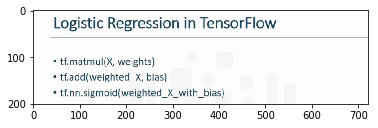

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("logreg.png")
plt.imshow(image)
plt.show()



In [20]:

import tensorflow as tf
import numpy as np


    #LOGISTIC REGRESSION



#COMPARING LINEAR REGRESSION WITH LOGISTIC REGRESSION
#USING SAME DATA


#WE USE SIGMOID FUNCTION IN LOGISTIC REGRESSION

def sigmoid(x):
    return 1/(1+np.exp(-x))#FORMULAR FOR SIGMOID


#DEFINE REAL DATA

x_data = np.random.randn(20000,3)

w_real = [0.4, 0.6, 0.2]#REAL WEIGHT

b_real = -0.3#REAL BIAS

#DEFINE LINEAR FUNCTION WB



#MULTIPLY REAL WEIGHT WITH X_DATA TRANSPOSE
wb = np.matmul(w_real,x_data.T)+b_real

#APPLY SIGMOID FUCTION
y_data_bef_noise = sigmoid(wb)


#APPLY NOISE
#binomial(1, y_data_bef_noise): 1 : MEANS 1 NO OF TRIAL
# y_data_bef_noise: MEANS Y_dATA BEFORE NOISE

y_data = np.random.binomial(1, y_data_bef_noise)


#DEFINE ITERATIOS
num_iters = 50
#DEFINE GRAPH
g = tf.Graph()
#DEFINE LIST
wb = []



#PLOT GRAPH


x = tf.placeholder(tf.float32, shape=[None, 3])
y_true = tf.placeholder(tf.float32, shape=None)
    
   
w = tf.Variable([[0,0,0]], dtype=tf.float32, name='W')
b = tf.Variable(0, dtype=tf.float32, name='b')



        #PREDICTED Y OUTPUT

#USE LOGISTIC REGRESSSION TF.MATMUL        
y_pred = tf.matmul(w, tf.transpose(x))+b



       #DEFINE LOSS WITH SIGMOID
        
   
       #USE THE SIGMOID FUNCTION WITH LOGISTIC REGRESION
    
        #logits=y_pred) : LOGITS OF PREDICTED OUTPUT
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
      


loss = tf.reduce_mean(loss)

        


        #DEFINE TRAINING
        
    
lr = 0.5#LEARNING RATE



        #USING GRADIENT DESCENT OPTIMIZER

        
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)
        
init = tf.global_variables_initializer()



    #RUN WITH TF_sESSION
    
with tf.Session() as sess:
        sess.run(init)
        
        for step in range(num_iters):
            sess.run(train, {x:x_data, y_true:y_data})
            if(step%5==0):
                print(step, sess.run([w,b]))
                wb.append(sess.run([w,b]))

       #AT THE 50TH STEP         
        print(50, sess.run([w,b]))


#OUTPUT: COMPARING TO REAL DATA w_real = [0.4, 0.6, 0.2], , b_real = -0.3
        
  #IT TAKES LONGER TO CONVERGE THAN LINEAR REGRESSION
  #BUT IT'S CONVERGENCE IS VERY ACCURATE



        


0 [array([[0.04528498, 0.06733298, 0.02104233]], dtype=float32), -0.034549974]
5 [array([[0.20162188, 0.29693195, 0.09376465]], dtype=float32), -0.1536016]
10 [array([[0.28772146, 0.42083806, 0.1338904 ]], dtype=float32), -0.21873327]
15 [array([[0.33820143, 0.4922892 , 0.15745369]], dtype=float32), -0.2565499]
20 [array([[0.3689983 , 0.5352964 , 0.17184798]], dtype=float32), -0.2793785]
25 [array([[0.38823614, 0.5618659 , 0.18084933]], dtype=float32), -0.29349384]
30 [array([[0.40042463, 0.57854575, 0.18655741]], dtype=float32), -0.30235332]
35 [array([[0.40821332, 0.58912295, 0.19020773]], dtype=float32), -0.30796736]
40 [array([[0.4132164 , 0.5958733 , 0.19255403]], dtype=float32), -0.31154704]
45 [array([[0.4164403 , 0.60019934, 0.19406675]], dtype=float32), -0.3138389]
50 [array([[0.41817477, 0.6025167 , 0.19488096]], dtype=float32), -0.3150656]


In [25]:
#LOGISTIC REGRESSION FOR CLASSIFICATION ON TENSORFLOWS MNIST DATA



from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1





# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))


W0827 19:42:51.532085  3456 deprecation.py:323] From <ipython-input-25-892bbc2342b3>:11: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0827 19:42:51.533069  3456 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0827 19:42:51.544577  3456 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Plea

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0827 19:42:52.218389  3456 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0827 19:42:52.266135  3456 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0827 19:42:52.399866  3456 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future vers

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.184212339
Epoch: 0002 cost= 0.665254338
Epoch: 0003 cost= 0.552803553
Epoch: 0004 cost= 0.498711065
Epoch: 0005 cost= 0.465497389
Epoch: 0006 cost= 0.442554469
Epoch: 0007 cost= 0.425477041
Epoch: 0008 cost= 0.412193000
Epoch: 0009 cost= 0.401387754
Epoch: 0010 cost= 0.392383820
Epoch: 0011 cost= 0.384739388
Epoch: 0012 cost= 0.378128426
Epoch: 0013 cost= 0.372427280
Epoch: 0014 cost= 0.367317697
Epoch: 0015 cost= 0.362745415
Epoch: 0016 cost= 0.358546942
Epoch: 0017 cost= 0.354883691
Epoch: 0018 cost= 0.351425644
Epoch: 0019 cost= 0.348308453
Epoch: 0020 cost= 0.345419302
Epoch: 0021 cost= 0.342773264
Epoch: 0022 cost= 0.340243077
Epoch: 0023 cost= 0.337929633
Epoch: 0024 cost= 0.335786020
Epoch: 0025 cost= 0.333685860
Optimization Finished!
Accuracy: 0.9142
